In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [42]:

file1 = '../seafood_data_junho/seafood_2022-06-30.csv'
file2 = '../seafood_data_junho/갈치2022.csv'


In [43]:
file1 = pd.read_csv(file1)
file2 = pd.read_csv(file2)

In [44]:
df1 = pd.DataFrame(file1)
df2 = pd.DataFrame(file2)

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80713 entries, 0 to 80712
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      80713 non-null  object
 1   어종      80713 non-null  object
 2   산지      80713 non-null  object
 3   규격      80713 non-null  object
 4   포장      80713 non-null  object
 5   수량      80713 non-null  object
 6   중량      80713 non-null  object
 7   평균가     80713 non-null  object
dtypes: object(8)
memory usage: 4.9+ MB


In [46]:
df1.columns

Index(['날짜', '어종', '산지', '규격', '포장', '수량', '중량', '평균가'], dtype='object')

In [47]:
df1.columns = ['date', 'species', 'origin', 'standard', 'unit', 'amount', 'weight', 'avg_price']

In [48]:
df1 = df1[df1.species=='(선)은갈치']

In [49]:
df1.head(3)

,date,species,origin,standard,unit,amount,weight,avg_price
53345,2017-01-02,(선)은갈치,제주도,10미,S/P,73,3.5,"87,200"
53346,2017-01-02,(선)은갈치,제주도,10미,S/P,29,4,"99,500"
53347,2017-01-02,(선)은갈치,제주도,10미,S/P,41,4.5,"123,700"


In [50]:
df1.describe()

,date,species,origin,standard,unit,amount,weight,avg_price
count,18813,18813,18813,18813,18813,18813,18813.0,18813
unique,1427,1,5,115,5,227,159.0,1932
top,2020-06-02,(선)은갈치,제주도,10미,S/P,1,5.0,"40,000"
freq,20,18813,18807,7061,18694,4291,4383.0,468


## 데이터타입 변환

In [51]:
df1[df1.date == '날짜']

,date,species,origin,standard,unit,amount,weight,avg_price


### 평균가에 , 기호 없애기

In [52]:
df1['avg_price'] = df1.avg_price.str.replace(',', '').astype('int')
# df['avg_price'] = df.avg_price.str.replace(',', '').astype('int')

### 중량에 , 기호 없애기 (중량 float로 변환)

In [53]:
# df['weight'] = df.avg_price.str.replace(',', '').astype('float')
df1['weight'] = df1['weight'].astype('float')
# df['weight'] = df['weight'].astype('float')

### 수량에 , 기호 없애기

In [54]:
df1['amount'] = df1.amount.str.replace(',', '').astype('int')

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18813 entries, 53345 to 80712
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       18813 non-null  object 
 1   species    18813 non-null  object 
 2   origin     18813 non-null  object 
 3   standard   18813 non-null  object 
 4   unit       18813 non-null  object 
 5   amount     18813 non-null  int32  
 6   weight     18813 non-null  float64
 7   avg_price  18813 non-null  int32  
dtypes: float64(1), int32(2), object(5)
memory usage: 1.1+ MB


In [56]:
df2.dtypes

날짜      object
어종      object
산지      object
규격      object
포장      object
수량       int64
중량     float64
평균가     object
dtype: object

In [57]:
df2[df2.날짜 == '날짜']

,날짜,어종,산지,규격,포장,수량,중량,평균가


In [58]:
df2.columns = ['date', 'species', 'origin', 'standard', 'unit', 'amount', 'weight', 'avg_price']

In [59]:
df2['avg_price'] = df2.avg_price.str.replace(',', '').astype('int')

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2310 non-null   object 
 1   species    2310 non-null   object 
 2   origin     2310 non-null   object 
 3   standard   2310 non-null   object 
 4   unit       2310 non-null   object 
 5   amount     2310 non-null   int64  
 6   weight     2310 non-null   float64
 7   avg_price  2310 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 135.5+ KB


In [61]:
df = pd.concat([df1, df2], axis=0)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21123 entries, 53345 to 2309
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       21123 non-null  object 
 1   species    21123 non-null  object 
 2   origin     21123 non-null  object 
 3   standard   21123 non-null  object 
 4   unit       21123 non-null  object 
 5   amount     21123 non-null  int64  
 6   weight     21123 non-null  float64
 7   avg_price  21123 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 1.4+ MB


### 날짜 데이터 년, 월, 일로 나누고 int형으로 변환

In [63]:
df['yyyy'], df['mm'], df['dd'] = df['date'].str.split('-').str

In [64]:
df.tail()

,date,species,origin,standard,unit,amount,weight,avg_price,yyyy,mm,dd
2305,2022-07-06,(선)은갈치,제주도,4미,S/P,1,5.0,250000,2022,07,06
2306,2022-07-06,(선)은갈치,제주도,5미,S/P,3,4.8,273300,2022,07,06
2307,2022-07-06,(선)은갈치,제주도,6미,S/P,1,4.0,152000,2022,07,06
2308,2022-07-06,(선)은갈치,제주도,6미,S/P,6,4.8,248300,2022,07,06
2309,2022-07-06,(선)은갈치,제주도,6미,S/P,2,5.0,237500,2022,07,06


In [65]:
df = df.drop('date', axis=1)

In [66]:
for i in ['yyyy', 'mm', 'dd']:
  df[i] = list(map(int, df[i]))

In [67]:
df.dtypes

species       object
origin        object
standard      object
unit          object
amount         int64
weight       float64
avg_price      int32
yyyy           int64
mm             int64
dd             int64
dtype: object

#### 년 / 월 / 일 별 가격변동

In [68]:
df[df.yyyy != 2022].groupby('mm').mean()

,amount,weight,avg_price,yyyy,dd
mm,,,,,
1,19.011993,5.016505,96168.189606,2019.064535,15.615648
2,15.939394,4.878322,115416.860917,2019.087024,13.956488
3,15.262626,4.863131,109298.196248,2019.061328,16.683261
4,12.975984,4.869380,116080.453636,2019.273516,16.244830
5,15.360315,4.933558,102159.977515,2019.120854,15.899944
6,19.938704,4.728255,86395.037945,2019.250438,15.180969
7,23.406674,4.901188,84398.246606,2019.162896,15.481335
8,31.497851,4.877839,70347.329650,2019.402087,15.680786
9,33.502246,4.977994,78956.511976,2019.466317,15.062126


### 년/월/일 별 평균가 확인

<AxesSubplot:xlabel='dd'>

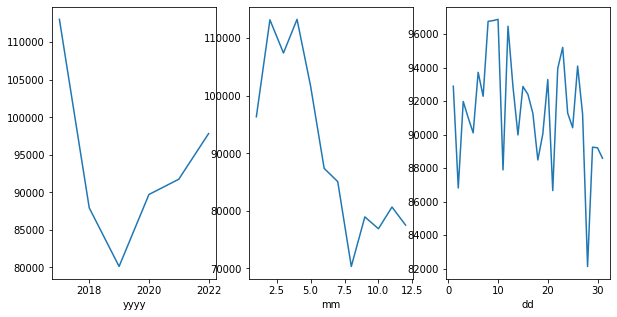

In [69]:
plt.figure(figsize=(10, 5))

plt.subplot(131)
Years = df.groupby('yyyy').mean()
Years['avg_price'].plot(x=df.yyyy)
plt.subplot(132)
# Months = df[df.yyyy != 2022].groupby('mm').mean()
Months = df.groupby('mm').mean()
Months['avg_price'].plot(x=df.mm)
plt.subplot(133)
Days = df.groupby('dd').mean()
Days['avg_price'].plot(x=df.dd)

#### 산지별 가격분포

Text(0, 0.5, 'origin')

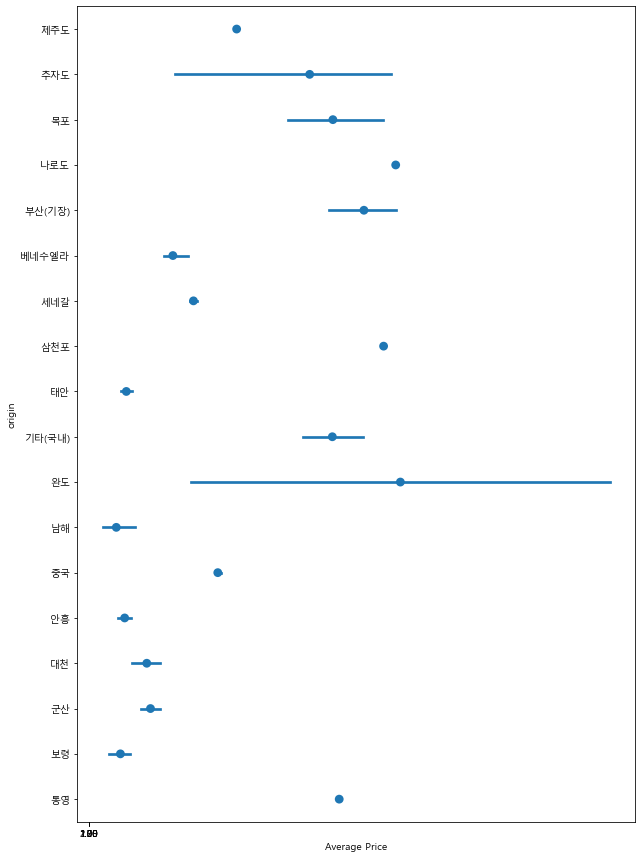

In [70]:
plt.rcParams['font.family']= 'Malgun Gothic'

plt.figure(figsize=(10, 15))
sns.pointplot(x='avg_price', y='origin', data=df, join=False)
plt.xticks(np.linspace(1, 2, 5))
plt.xlabel('Average Price')
plt.ylabel('origin')

In [71]:
eg_pdf = df[df.species=='(선)은갈치']

In [72]:
eg_pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20805 entries, 53345 to 2309
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    20805 non-null  object 
 1   origin     20805 non-null  object 
 2   standard   20805 non-null  object 
 3   unit       20805 non-null  object 
 4   amount     20805 non-null  int64  
 5   weight     20805 non-null  float64
 6   avg_price  20805 non-null  int32  
 7   yyyy       20805 non-null  int64  
 8   mm         20805 non-null  int64  
 9   dd         20805 non-null  int64  
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 1.7+ MB


Text(0, 0.5, 'origin')

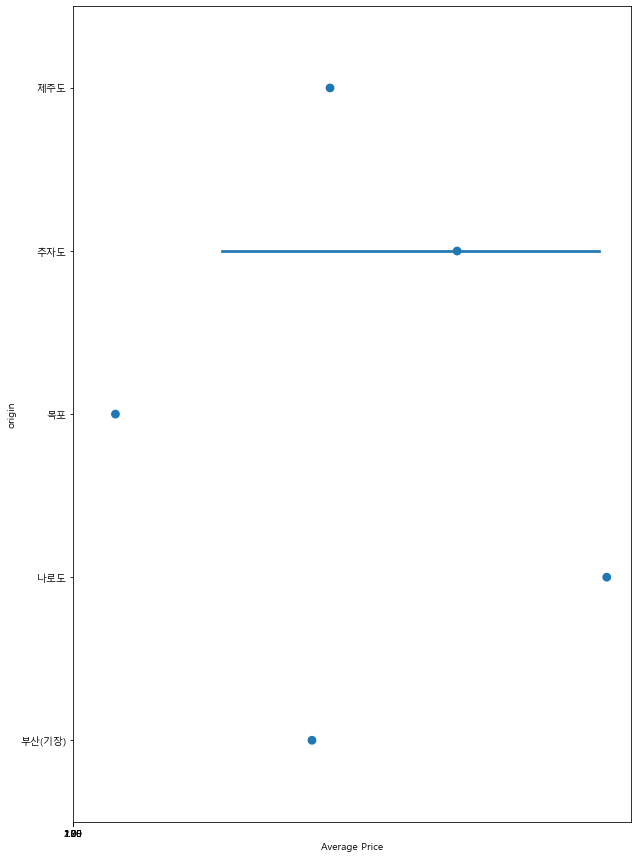

In [73]:
plt.rcParams['font.family']= 'Malgun Gothic'

plt.figure(figsize=(10, 15))
sns.pointplot(x='avg_price', y='origin', data=eg_pdf, join=False)
plt.xticks(np.linspace(1, 2, 5))
plt.xlabel('Average Price')
plt.ylabel('origin')

In [74]:
eg_pdf.head()

,species,origin,standard,unit,amount,weight,avg_price,yyyy,mm,dd
53345,(선)은갈치,제주도,10미,S/P,73,3.5,87200,2017,1,2
53346,(선)은갈치,제주도,10미,S/P,29,4.0,99500,2017,1,2
53347,(선)은갈치,제주도,10미,S/P,41,4.5,123700,2017,1,2
53348,(선)은갈치,제주도,10미,S/P,88,5.0,143600,2017,1,2
53349,(선)은갈치,제주도,20미,S/P,7,5.0,68600,2017,1,2


In [75]:
eg_pdf['origin'].count()

20805

In [76]:
eg_pdf['origin'].value_counts()

제주도       20799
추자도           3
목포            1
나로도           1
부산(기장)        1
Name: origin, dtype: int64

### 10자리 이하를 제외한 제주도만을 쿼리
-> 5년동안 제주 이외의 지역에서 잡힌 (선)은갈치는 6마리임으로 제주산만 고려해도 좋다고 봄

In [77]:
# origin_mask = (jb_pdf.origin == '완도')|(jb_pdf.origin == '서산')|(jb_pdf.origin == '여수')|(jb_pdf.origin == '대천')|(jb_pdf.origin == '군산')

# jb_pdf = jb_pdf.loc[origin_mask, :]

In [78]:
eg_pdf = eg_pdf[eg_pdf.origin == '제주도']

In [79]:
eg_pdf['origin'].value_counts()

제주도    20799
Name: origin, dtype: int64

In [80]:
eg_pdf['standard'].value_counts()

10미       7793
20미       2194
25미       1437
5미        1015
6미         978
          ... 
26/27미       1
11/12미       1
소소           1
46/47미       1
8/9미         1
Name: standard, Length: 117, dtype: int64

In [81]:
standard_mask = (eg_pdf.standard == '10미')|(eg_pdf.standard == '20미')|(eg_pdf.standard == '25미')|(eg_pdf.standard == '5미')

eg_pdf = eg_pdf.loc[standard_mask, :]

In [82]:
eg_pdf['standard'].value_counts()

10미    7793
20미    2194
25미    1437
5미     1015
Name: standard, dtype: int64

#### 추려낸 위 규격에서 가장 많은 포장을 차지하는 S/P 포장으로 단일화

In [83]:
eg_pdf['unit'].value_counts()

S/P        12353
box           64
c/s(상자)       14
CT/(BT)        6
kg             2
Name: unit, dtype: int64

In [84]:
eg_pdf = eg_pdf[eg_pdf.unit == 'S/P']

In [85]:
eg_pdf.head(3)

,species,origin,standard,unit,amount,weight,avg_price,yyyy,mm,dd
53345,(선)은갈치,제주도,10미,S/P,73,3.5,87200,2017,1,2
53346,(선)은갈치,제주도,10미,S/P,29,4.0,99500,2017,1,2
53347,(선)은갈치,제주도,10미,S/P,41,4.5,123700,2017,1,2


In [86]:
eg_pdf[eg_pdf.unit != 'S/P']

,species,origin,standard,unit,amount,weight,avg_price,yyyy,mm,dd


In [87]:
eg_pdf = eg_pdf.drop(['species', 'unit'], axis=1)

eg_pdf.head()

,origin,standard,amount,weight,avg_price,yyyy,mm,dd
53345,제주도,10미,73,3.5,87200,2017,1,2
53346,제주도,10미,29,4.0,99500,2017,1,2
53347,제주도,10미,41,4.5,123700,2017,1,2
53348,제주도,10미,88,5.0,143600,2017,1,2
53349,제주도,20미,7,5.0,68600,2017,1,2


### 범주형 데이터 OHE 수행

In [88]:
eg_pdf = pd.get_dummies(eg_pdf, columns=['origin', 'standard'])

In [89]:
eg_pdf.head(3)

,amount,weight,avg_price,yyyy,mm,dd,origin_제주도,standard_10미,standard_20미,standard_25미,standard_5미
53345,73,3.5,87200,2017,1,2,1,1,0,0,0
53346,29,4.0,99500,2017,1,2,1,1,0,0,0
53347,41,4.5,123700,2017,1,2,1,1,0,0,0


In [90]:
len(eg_pdf.columns)

11

In [91]:
eg_pdf.describe()

,amount,weight,avg_price,yyyy,mm,dd,origin_제주도,standard_10미,standard_20미,standard_25미,standard_5미
count,12353.000000,12353.000000,12353.000000,12353.000000,12353.000000,12353.000000,12353.0,12353.000000,12353.000000,12353.000000,12353.000000
mean,29.431231,4.613203,87006.160447,2019.484093,6.389298,15.801830,1.0,0.625840,0.176718,0.115842,0.081600
std,32.520390,1.272718,52259.207516,1.530591,3.408630,8.792729,0.0,0.483925,0.381445,0.320049,0.273765
min,1.000000,1.000000,8000.000000,2017.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.800000,45000.000000,2018.000000,4.000000,8.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,20.000000,4.500000,74100.000000,2020.000000,6.000000,16.000000,1.0,1.000000,0.000000,0.000000,0.000000
75%,40.000000,5.000000,120000.000000,2021.000000,9.000000,23.000000,1.0,1.000000,0.000000,0.000000,0.000000
max,433.000000,63.000000,404000.000000,2022.000000,12.000000,31.000000,1.0,1.000000,1.000000,1.000000,1.000000


## 시각화

In [92]:
num_cols = ['amount', 'weight', 'avg_price', 'yyyy', 'mm', 'dd']
num_eg_pdf = eg_pdf[num_cols]

<AxesSubplot:>

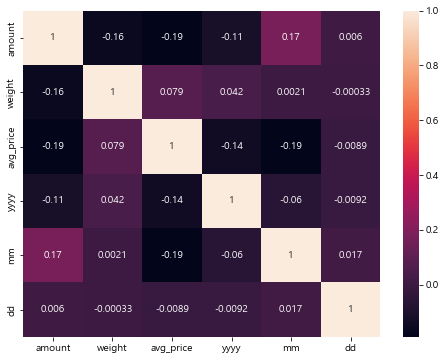

In [93]:
plt.figure(figsize=(8, 6))
sns.heatmap(num_eg_pdf.corr(), annot=True)

In [94]:
print(eg_pdf.columns)
print("컬럼 수 :", len(eg_pdf.columns))

Index(['amount', 'weight', 'avg_price', 'yyyy', 'mm', 'dd', 'origin_제주도',
       'standard_10미', 'standard_20미', 'standard_25미', 'standard_5미'],
      dtype='object')
컬럼 수 : 11


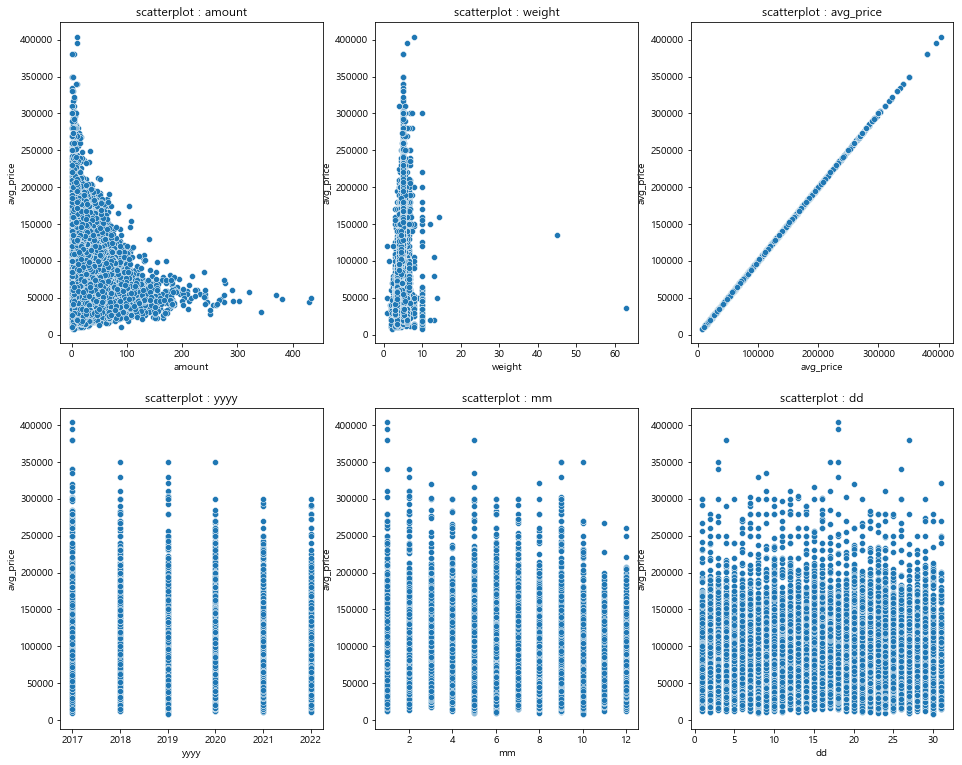

In [95]:
fig, ax = plt.subplots(nrows = 2, ncols =3)
fig.set_size_inches(16,13)
for i in range(len(num_eg_pdf.columns)):
    sns.scatterplot(data = num_eg_pdf, y = 'avg_price' ,x = num_eg_pdf.columns[i], ax= ax[int(i//3)][int(i%3)])
    ax[int(i//3)][int(i%3)].set_title("scatterplot : " + num_eg_pdf.columns[i])

plt.show()

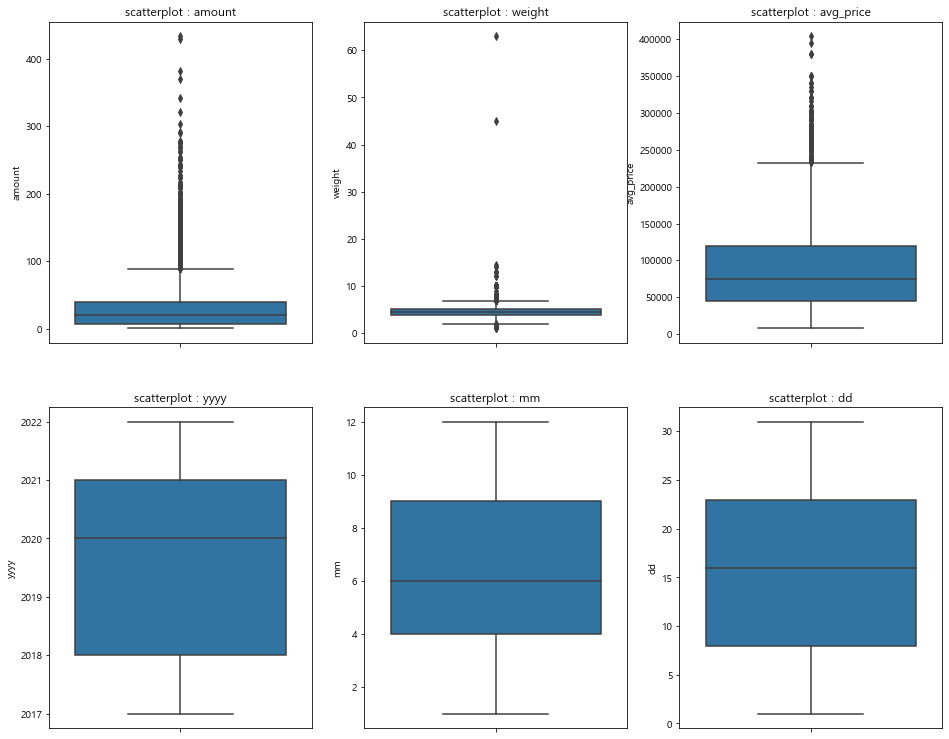

In [96]:
fig, ax = plt.subplots(nrows = 2, ncols =3)
fig.set_size_inches(16,13)
for i in range(len(num_eg_pdf.columns)):
    sns.boxplot(data = num_eg_pdf, y = num_eg_pdf.columns[i], ax= ax[int(i//3)][int(i%3)])
    ax[int(i//3)][int(i%3)].set_title("scatterplot : " + num_eg_pdf.columns[i])

plt.show()

### 결측치 제거

amout > 400 이상 데이터 제거
-> 제거 안해도 괜찮을 거라고 봄

In [97]:
eg_pdf['amount'].sort_values()

825        1
62212      1
55759      1
73975      1
62193      1
        ... 
62292    342
57009    370
57199    381
56781    429
56959    433
Name: amount, Length: 12353, dtype: int64

In [98]:
# eg_pdf = eg_pdf[eg_pdf.amount < 1000]

weight > 40 이상 데이터 제거

In [99]:
eg_pdf['weight'].sort_values()

77197     1.0
73600     1.0
59739     1.0
68459     1.5
76842     1.8
         ... 
60356    13.0
79314    14.0
60433    14.5
69846    45.0
62680    63.0
Name: weight, Length: 12353, dtype: float64

In [100]:
eg_pdf = eg_pdf[eg_pdf.weight < 40]

avg_price > 350000 제거할 지 말지 고민 일단 돌려보자

In [101]:
eg_pdf['avg_price'].sort_values()

69512      8000
69503      8000
68610     10000
55324     10000
67635     10000
          ...  
63535    350000
53781    380000
55260    380000
53633    395100
53634    404000
Name: avg_price, Length: 12351, dtype: int32

In [102]:
eg_pdf.count()

amount          12351
weight          12351
avg_price       12351
yyyy            12351
mm              12351
dd              12351
origin_제주도      12351
standard_10미    12351
standard_20미    12351
standard_25미    12351
standard_5미     12351
dtype: int64

In [103]:
eg_pdf.to_csv('cleaned_eg.csv')

## 선형 회귀

In [122]:
eg_pdf.head()

,amount,weight,avg_price,yyyy,mm,dd,origin_제주도,standard_10미,standard_20미,standard_25미,standard_5미
53345,73,3.5,87200,2017,1,2,1,1,0,0,0
53346,29,4.0,99500,2017,1,2,1,1,0,0,0
53347,41,4.5,123700,2017,1,2,1,1,0,0,0
53348,88,5.0,143600,2017,1,2,1,1,0,0,0
53349,7,5.0,68600,2017,1,2,1,0,1,0,0


In [123]:
X = eg_pdf.drop(columns='avg_price')
y = eg_pdf['avg_price']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, shuffle =True, test_size = 0.2)

In [125]:
eg_model_lr = LinearRegression()
eg_model_lr.fit(X_train, y_train)
eg_lr_y_pred = eg_model_lr.predict(X_test)

In [126]:
print(eg_model_lr.score(X_train, y_train))
print(eg_model_lr.score(X_test, y_test))

0.6416106140864888
0.6272684835816675


In [127]:
MSE = mean_squared_error(y_test, eg_lr_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, eg_lr_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 976288291.15245, RMSE : 31245.61235
r2_score :  0.6272684835816675


In [128]:
y_test = np.array(y_test)

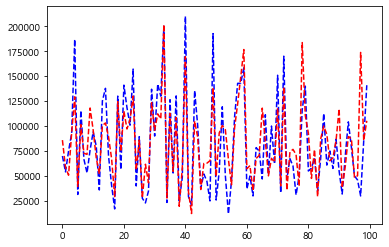

In [129]:
y_test = np.array(y_test)

real = []
pred = []
index = []

for i in range(100):
  index.append(i)
  real.append(y_test[i])
  pred.append(eg_lr_y_pred[i])
  
plt.plot(index, real, 'b--', label="Real")
plt.plot(index, pred, 'r--', label="Pred")
plt.show()

In [130]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
# minmax_scaler = MinMaxScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [132]:
eg_model_lr.fit(x_train_scaled, y_train)
eg_y_pred_scaled = eg_model_lr.predict(x_test_scaled)

In [133]:
MSE = mean_squared_error(y_test, eg_y_pred_scaled)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, eg_y_pred_scaled)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 986279003.09821, RMSE : 31405.07926
r2_score :  0.6234541868750598


## 랜덤포레스트

In [134]:
eg_model_rf = RandomForestRegressor()

eg_model_rf.fit(X_train, y_train)
eg_rf_y_pred = eg_model_rf.predict(X_test)

In [135]:
MSE = mean_squared_error(y_test, eg_rf_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, eg_rf_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 405670761.74221, RMSE : 20141.27011
r2_score :  0.8451212827593532


In [136]:
rf_parameters = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 5, 6, 9, 12],
    # 'max_depth': [5, 6, 9, 12],
    # 'min_samples_split': [0.01, 0.02, 0.1, 0.15],
    # 'max_features': ['auto', 'sqrt'],
    'random_state':[99]
}

cv = KFold(n_splits=6)

rf = RandomForestRegressor()
rf_grid_cv = GridSearchCV(rf, param_grid=rf_parameters, cv=cv, n_jobs=1, scoring='r2')
rf_grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', rf_grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(rf_grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': None, 'n_estimators': 250, 'random_state': 99}
최적 예측 정확도: 0.8846


In [139]:
eg_model_rf = rf_grid_cv.best_estimator_
eg_rf_y_pred = eg_model_rf.predict(X_test)

In [140]:
MSE = mean_squared_error(y_test, eg_rf_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, eg_rf_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 402135055.52596, RMSE : 20053.30535
r2_score :  0.8464711597900793


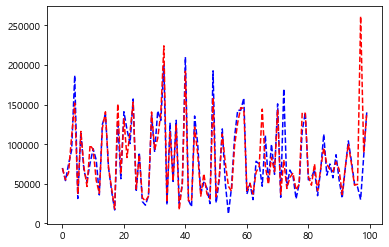

In [141]:
real = []
pred = []
index = []

for i in range(100):
  index.append(i)
  real.append(y_test[i])
  pred.append(eg_rf_y_pred[i])
  
plt.plot(index, real, 'b--', label="Real")
plt.plot(index, pred, 'r--', label="Pred")
plt.show()

## XGBRegressor

In [142]:
eg_model_xgb = XGBRegressor()

eg_model_xgb.fit(X_train, y_train)
eg_xgb_y_pred = eg_model_xgb.predict(X_test)

In [143]:
MSE = mean_squared_error(y_test, eg_xgb_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, eg_xgb_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 345798981.76404, RMSE : 18595.67105
r2_score :  0.8679793868093229


xgb에 gcv 해본 것

In [144]:
xg_parameters ={'max_depth' : [3,4,5,6] , 
                # 'n_estimators': [12,24,32], 
                'n_estimators': [100,200,300], 
                'learning_rate':[0.01, 0.1], 
                # 'learning_rate':[0.1, 0.3, 0.5], 
                'gamma': [1, 2, 4], 
                'random_state':[99]}

xgb = XGBRegressor()
xgb_grid_cv = GridSearchCV(xgb, param_grid=xg_parameters, cv=6, n_jobs=-1, scoring='r2')
xgb_grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', xgb_grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(xgb_grid_cv.best_score_))


최적 하이퍼 파라미터: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'random_state': 99}
최적 예측 정확도: 0.8979


In [145]:
eg_model_xgb = xgb_grid_cv.best_estimator_
eg_xgb_y_pred = eg_model_xgb.predict(X_test)

In [146]:
MSE = mean_squared_error(y_test, eg_xgb_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, eg_xgb_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 328322744.03388, RMSE : 18119.67836
r2_score :  0.8746515395427717


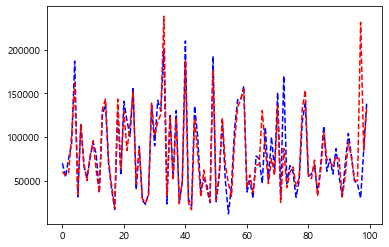

In [147]:
real = []
pred = []
index = []

for i in range(100):
  index.append(i)
  real.append(y_test[i])
  pred.append(eg_xgb_y_pred[i])
  
plt.plot(index, real, 'b--', label="Real")
plt.plot(index, pred, 'r--', label="Pred")
plt.show()

## lightGBM

In [148]:
eg_model_lgb = LGBMRegressor()

eg_model_lgb.fit(X_train, y_train)
eg_lgb_y_pred = eg_model_lgb.predict(X_test)

In [149]:
MSE = mean_squared_error(y_test, eg_lgb_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, eg_lgb_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 362641300.02103, RMSE : 19043.14312
r2_score :  0.8615492545616874


In [150]:
# lgb_parameters ={'max_depth' : [3,4,5,6] ,  
#                 'n_estimators': [100,300,500], 
#                 'learning_rate':[0.01, 0.05, 0.1],   
#                 'random_state':[99]}

lgb_parameters ={
    'n_estimators': [200, 500, 1000, 2000],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [6, 7, 8],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'subsample': [0.8, 0.9, 1.0] 
                }

lgb = LGBMRegressor()
lgb_grid_cv = GridSearchCV(lgb, param_grid=lgb_parameters, cv=6, n_jobs=-1, scoring='r2')
lgb_grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', lgb_grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(lgb_grid_cv.best_score_))

In [501]:
eg_model_lgb = lgb_grid_cv.best_estimator_
eg_lgb_y_pred = eg_model_lgb.predict(X_test)

In [502]:
MSE = mean_squared_error(y_test, eg_lgb_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, eg_lgb_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 1574707.46607, RMSE : 1254.87349
r2_score :  0.8501196012282868


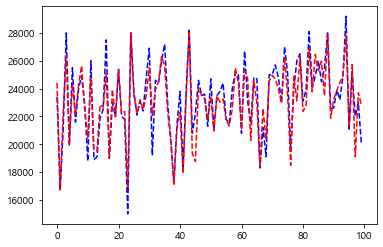

In [503]:
real = []
pred = []
index = []

for i in range(100):
  index.append(i)
  real.append(y_test[i])
  pred.append(eg_lgb_y_pred[i])
  
plt.plot(index, real, 'b--', label="Real")
plt.plot(index, pred, 'r--', label="Pred")
plt.show()